**Problem Statement**

**`A retail company "ABC Private Limited" wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The dataset also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.`**

**Objective**

**`To build a model to predict the purchase amount of customers against various products which will help them to create personlised offer for customers against different products`**

**Evaluation Metric:** **`Root mean Squard score (RMSE)`**

**Variable Definitions**

                        1.  User_ID                             User ID
                        2.  Product_ID                          Product_ID
                        3.  Gender                              Sex of User
                        4.  Age                                 Age in Bins
                        5.  Occupation                          Occupation(Masked)
                        6.  City_category                       Category of the city (A,B,C)
                        7.  Stay_in_current_city_years          Number of years stayed in current city
                        8.  Marital_Status                      Marital Status
                        9.  Product_Category_1                  Product Category (Masked)
                        10. Product_Category_2                  Product may belong to other Category (Masked)
                        11. Product_Category_3                  Product may belong to other Category (Masked)
                        12. Purchase                            Purchase Amount (Target Variable)

In [1]:
path = "C:/Machine_learning_datafiles/AnalyticsVidya/Black Friday sales"

In [2]:
import os, gc, warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import missingno as msno

In [4]:
plt.style.use('ggplot')
pd.set_option('display.max_columns', 100)
%matplotlib inline

In [5]:
#for reproducibility
import random
seed= 42
random.seed(seed)
np.random.seed(seed)

In [266]:
from collections import Counter

In [6]:
#importing data
train = pd.read_csv(path+'/Train.csv')
test = pd.read_csv(path+'/Test.csv')
subfile = pd.read_csv(path+'/Sample_Submission.csv')

In [7]:
train.shape, test.shape

((550068, 12), (233599, 11))

In [10]:
def randomColors(color_type='hex'):
    """
    Random color generator
    :Returns Hex or RGB colors
    """
    np.random.RandomState(seed)
    if color_type == 'rgba':
        color_generator= np.random.randint(0,255,3)
        color = (color_generator[0], color_generator[1], color_generator[2])
    elif color_type == 'hex':
        color_generator = [i for i in range(0,10)]+['A', 'B', 'C', 'D', 'E']
        colors= np.random.choice(color_generator, 6, replace=False)
        color = '#'+''.join(colors)
    return color

In [9]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


**Checking for missing features**

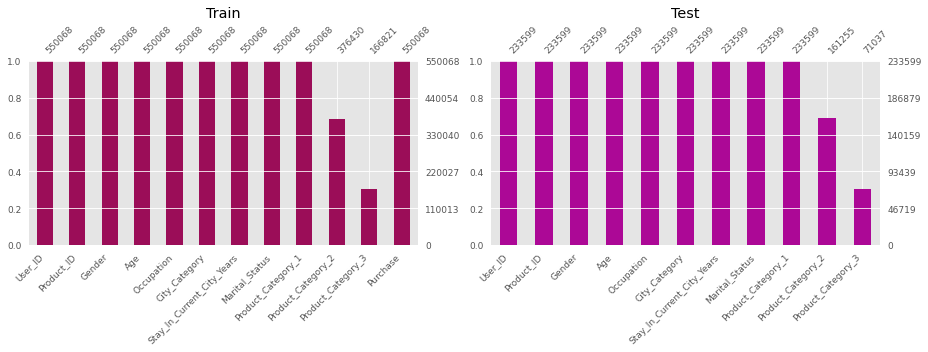

In [11]:
plt.subplot(121)
plt.title('Train')
msno.bar(train, figsize=(13,5), fontsize=9, color=randomColors())
plt.subplot(122)
plt.title('Test')
msno.bar(test, figsize=(13,5), fontsize=9, color= randomColors())
plt.tight_layout(w_pad=1.0);

***`Product Categories 2 and 3 have missing values`***

**EDA**

In [12]:
print('There are {:,} unique products sold by ABC Private Limited'.format(train.append(test).Product_ID.nunique()))
print('There are {:,} unique customers who have bought from ABC Private Limited'.format(
    train.append(test).User_ID.nunique()))

There are 3,677 unique products sold by ABC Private Limited
There are 5,891 unique customers who have bought from ABC Private Limited


In [13]:
print('There are {} unique Occupations'.format(train.append(test).Occupation.nunique()))
print('There are {} unique cities'.format(train.append(test).City_Category.nunique()))

There are 21 unique Occupations
There are 3 unique cities


In [14]:
np.sort(train.append(test).Product_Category_2.unique())

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15., 16., 17., 18., nan])

In [15]:
np.sort(train.append(test).Product_Category_1.unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20], dtype=int64)

In [16]:
np.sort(train.append(test).Product_Category_3.unique())

array([ 3.,  4.,  5.,  6.,  8.,  9., 10., 11., 12., 13., 14., 15., 16.,
       17., 18., nan])

In [17]:
np.sort(train.append(test).Age.unique())

array(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'],
      dtype=object)

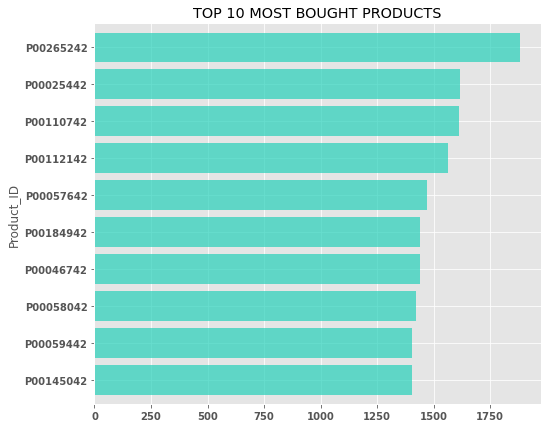

In [19]:
train.groupby('Product_ID').User_ID.count().sort_values()[-10:].plot(
    kind='barh', title='TOP 10 MOST BOUGHT PRODUCTS', color=randomColors(), 
    figsize=(8,7), width=0.8, alpha=0.7)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold');

**`Product P00265242 is the most bought product. Followed by P00025442 and P00110742`**

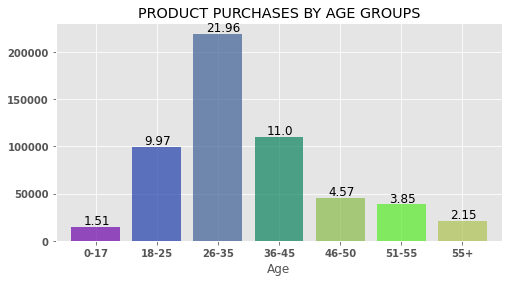

In [411]:
ax = train.groupby(['Age']).Product_ID.count().plot(
    kind='bar', title='PRODUCT PURCHASES BY AGE GROUPS', label='Age Groups',
    figsize=(8,4), width=0.8, alpha=0.7, rot=0, color=[randomColors() for i in range(7)])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

for i in ax.patches:
    plt.text(i.get_x()+0.2, i.get_height()+3e3, str(round(i.get_height()/1e4,2)), fontsize=12, fontweight=70.5);

**`Most Products are bought by customers with the age of 26 and 35 (inclusive)`**

`Let's check the most bought products by customers within tha Ages of 26 to 35`

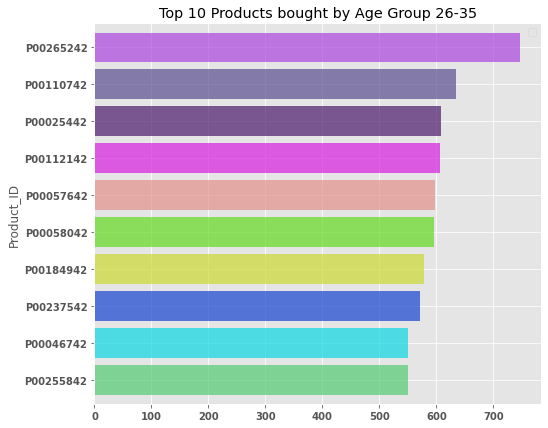

In [21]:
train.groupby(['Age', 'Product_ID']).User_ID.count().sort_values()[-10:].reset_index().plot.barh(
    x='Product_ID', y='User_ID', figsize=(8,7), width=0.8, alpha=0.7,
    title='Top 10 Products bought by Age Group 26-35',
    color=[randomColors() for i in range(10)])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend([]);

**`Product P00265242 is the most purchased product by customers within the ages 25-35.`** 

`This Product is also the most purchased product by the customers of ABC Private Limited.`

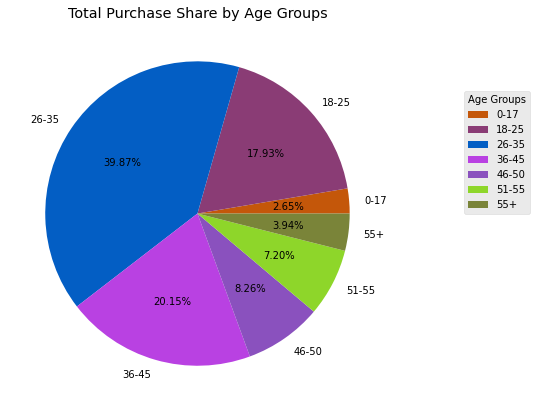

In [169]:
train.groupby('Age').Purchase.sum().plot.pie(
    figsize=(9,7), autopct='%.2f%%', title='Total Purchase Share by Age Groups', ylabel='',
    colors=[randomColors() for i in range(7)])
plt.legend(title='Age Groups', loc=(1.2, 0.5));

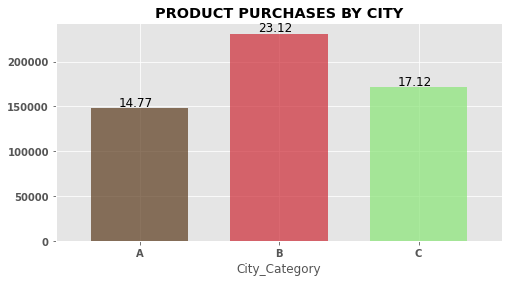

In [409]:
ax = train.groupby('City_Category').Product_ID.count().plot(
    kind='bar', figsize=(8,4), width=0.7, alpha=0.7, rot=0, color=[randomColors() for i in range(3)])
plt.title('PRODUCT PURCHASES BY CITY', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

for i in ax.patches:
    plt.text(i.get_x()+0.2, i.get_height()+3e3, str(round(i.get_height()/1e4,2)), fontsize=12, fontweight=60.5);

**`Most Customers live in City B`**

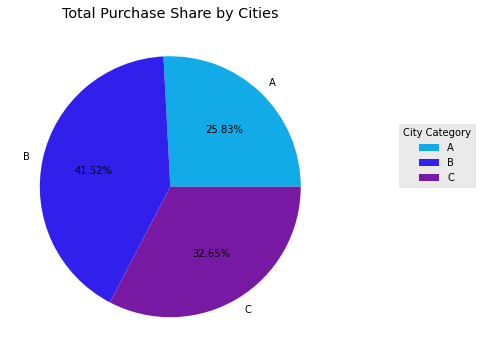

In [197]:
train.groupby('City_Category').Purchase.sum().plot.pie(
    figsize=(9,6), autopct='%.2f%%', title='Total Purchase Share by Cities', ylabel='',
    colors=[randomColors() for i in range(3)])
plt.legend(title='City Category', loc=(1.2, 0.5));

**`Customers who patronise ABC Private Limited are customers that are in Location B`**

`Let's see the age groups located in such cities`

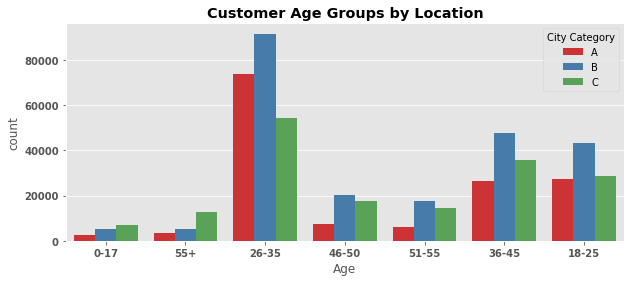

In [216]:
plt.figure(figsize=(10,4))
sns.countplot('Age', data=train, hue='City_Category', hue_order=['A', 'B', 'C'], palette='Set1')
plt.title('Customer Age Groups by Location', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(title='City Category');

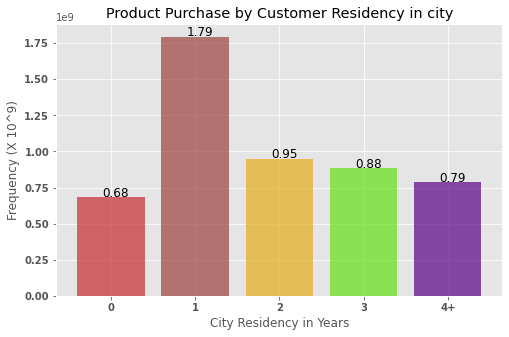

In [402]:
ax = train.groupby('Stay_In_Current_City_Years').Purchase.sum().plot.bar(
    rot=0, figsize=(8,5), title='Product Purchase by Customer Residency in city',
    color=[randomColors() for i in range(5)], width=0.8,
    alpha= 0.7, xlabel='City Residency in Years', ylabel='Frequency (X 10^9)'
)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

for i in ax.patches:
    plt.text(i.get_x()+0.3, i.get_height()+5e6, str(round(i.get_height()/1e9, 2)), fontsize=12, fontweight=20.5);

**`Customers who purchase more are customers that have stayed a year in the city`** 

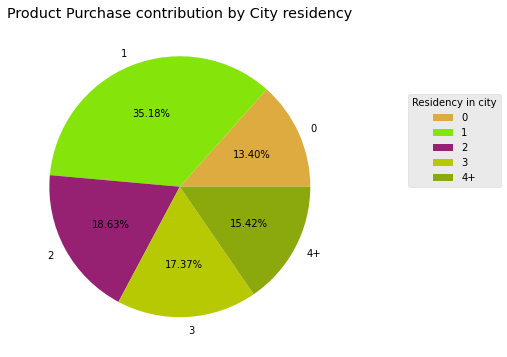

In [200]:
train.groupby('Stay_In_Current_City_Years').Purchase.sum().plot.pie(
    figsize=(9,6), title='Product Purchase contribution by City residency', autopct='%.2f%%',
    colors=[randomColors() for i in range(5)], ylabel='')
plt.legend(title='Residency in city', loc=(1.2, 0.5));

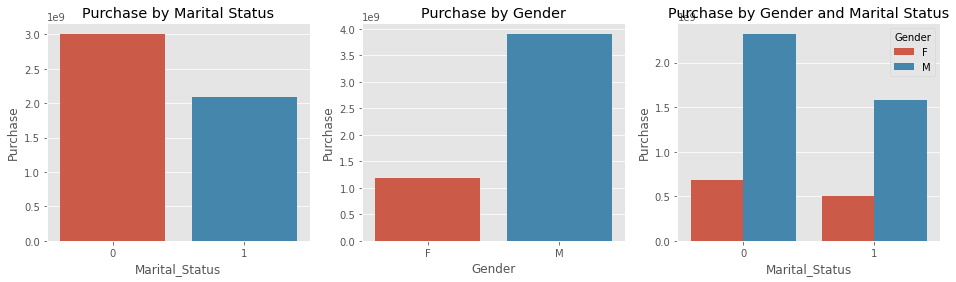

In [181]:
fig, ax= plt.subplots(1,3,figsize=(16,4))
sns.barplot('Marital_Status', 'Purchase', data=train, estimator=np.sum, ci=None, ax=ax[0])
ax[0].set(title ='Purchase by Marital Status')
sns.barplot('Gender', 'Purchase', data=train, estimator=np.sum, ci=None, ax=ax[1])
ax[1].set(title ='Purchase by Gender')
sns.barplot('Marital_Status', 'Purchase', data=train, hue='Gender', estimator=np.sum, ci=None, ax=ax[2]);
ax[2].set(title ='Purchase by Gender and Marital Status');

**`Unmarried customers purchase more than married customers while Males purchase more products than females`**

`Since the products are masked we cannot state confidently the reason why it is so. We may infer that because unmarried people have less responsibilities they'll likely purchase more products than the married ones`

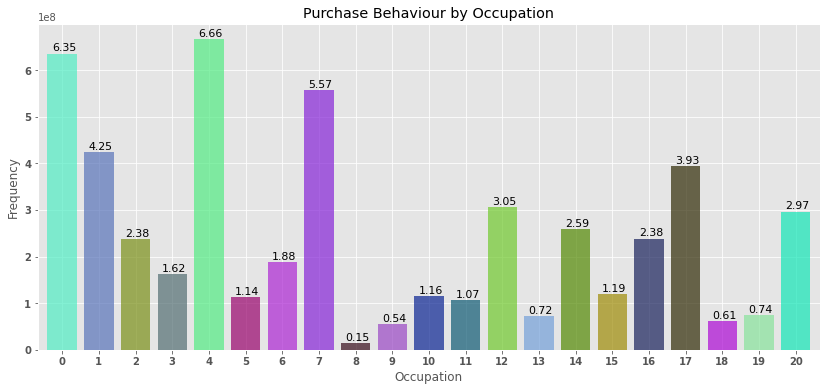

In [392]:
ax = train.groupby('Occupation').Purchase.sum().plot.bar(
    rot=0, figsize=(14,6), title='Purchase Behaviour by Occupation',
    color=[randomColors() for i in range(21)], width=0.8,
    alpha= 0.7, xlabel='Occupation', ylabel='Frequency'
)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
for i in ax.patches:
    plt.text(i.get_x()+0.12, i.get_height()+6e6, str(round((i.get_height()/1e8),2)), fontsize=11, fontweight=70.5);

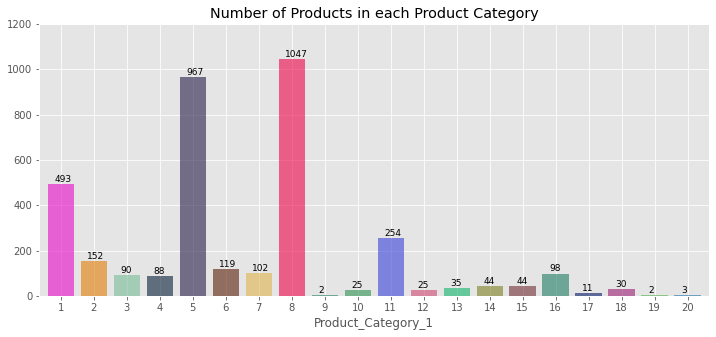

In [358]:
ax = train.groupby('Product_Category_1').Product_ID.nunique().plot.bar(
    rot=0, color=[randomColors() for i in range(20)], width=0.8, figsize=(12,5), alpha=0.6, ylim = (0, 1200),
    title = 'Number of Products in each Product Category')
for i in ax.patches:
    plt.text(i.get_x()+0.2, i.get_height()+10.2, str(i.get_height()), fontsize=9, fontweight=20.5);

**`Most Products are in Product Categories 8 and 5`**

**`Number of Unique products purchased by customers Age and Location`**

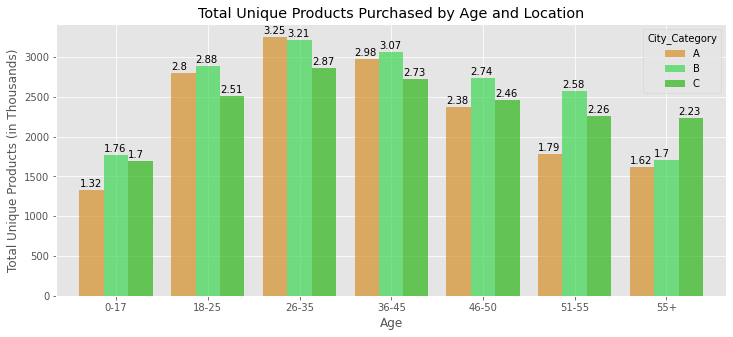

In [396]:
ax= train.groupby(['Age', 'City_Category']).Product_ID.nunique().sort_values().unstack(1).plot(
    kind='bar', figsize=(12,5), color=[randomColors() for i in range(7)], alpha=0.65, rot=0,
    title='Total Unique Products Purchased by Age and Location', width=0.8, 
    ylabel='Total Unique Products (in Thousands)')
for i in ax.patches:
    plt.text(i.get_x(), i.get_height()+40.2, str(round(i.get_height()/1e3,2)), fontsize=10, fontweight=20.5);

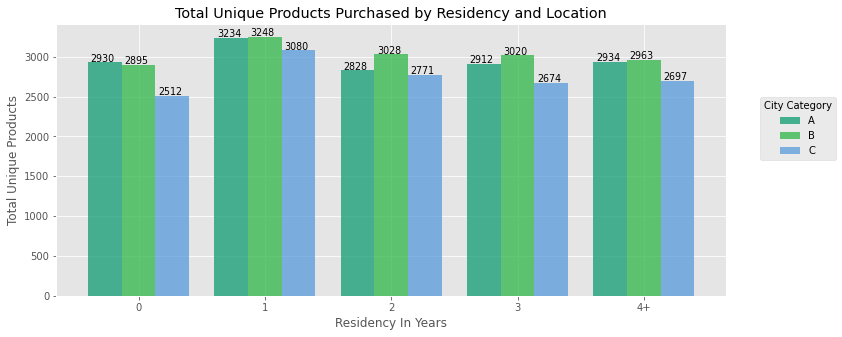

In [400]:
ax= train.groupby(['Stay_In_Current_City_Years', 'City_Category']).Product_ID.nunique().unstack(1).plot(
    kind='bar', figsize=(12,5), color=[randomColors() for i in range(7)], 
    alpha=0.75, rot=0, xlabel='Residency In Years', width=0.8, ylabel='Total Unique Products',
    title='Total Unique Products Purchased by Residency and Location')
plt.legend(title='City Category', loc=(1.05,0.5))

for i in ax.patches:
    plt.text(i.get_x()+0.02, i.get_height()+10.2, str(i.get_height()), fontsize=9.5, fontweight=20.5);

**`Most bought Products by Age and City`**

In [291]:
train.append(test).groupby(['Age', 'City_Category']).Product_ID.apply(
    lambda x: sorted(Counter(x.values).items(), key=lambda x: x[1], reverse=True)[0]).unstack(0)

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
City_Category,,,,,,,
A,"(P00117442, 13)","(P00265242, 123)","(P00265242, 272)","(P00265242, 89)","(P00265242, 23)","(P00059442, 27)","(P00265242, 21)"
B,"(P00112142, 28)","(P00265242, 194)","(P00265242, 368)","(P00025442, 175)","(P00102642, 66)","(P00265242, 67)","(P00265242, 29)"
C,"(P00255842, 52)","(P00265242, 238)","(P00265242, 426)","(P00025442, 237)","(P00265242, 111)","(P00265242, 102)","(P00265242, 104)"


**`Most bought Products by Age and Sex`**

In [290]:
train.append(test).groupby(['Age', 'Gender']).Product_ID.apply(
    lambda x: sorted(Counter(x.values).items(), key=lambda x: x[1], reverse=True)[0]).unstack(0)

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
Gender,,,,,,,
F,"(P00102642, 31)","(P00265242, 145)","(P00265242, 275)","(P00265242, 133)","(P00265242, 61)","(P00265242, 51)","(P00265242, 42)"
M,"(P00237542, 62)","(P00265242, 410)","(P00265242, 791)","(P00025442, 393)","(P00025442, 138)","(P00265242, 143)","(P00265242, 112)"


In [317]:
train.append(test).groupby(['Gender', 'City_Category','Product_ID']).Product_ID.count()

Gender  City_Category  Product_ID
F       A              P00000142     88
                       P00000242     33
                       P00000342     31
                       P00000442     21
                       P00000542     17
                                     ..
M       C              P0099442      56
                       P0099542       1
                       P0099642       3
                       P0099742      32
                       P0099842      18
Name: Product_ID, Length: 19727, dtype: int64

In [299]:
train.append(test).groupby(['User_ID']).Product_ID.apply(
    lambda x: sorted(Counter(x.values).items(), key=lambda x: x[1], reverse=True))

User_ID
1000001    [(P00069042, 1), (P00248942, 1), (P00087842, 1...
1000002    [(P00285442, 1), (P00112842, 1), (P00293242, 1...
1000003    [(P00193542, 1), (P00132842, 1), (P0098342, 1)...
1000004    [(P00184942, 1), (P00346142, 1), (P0097242, 1)...
1000005    [(P00274942, 1), (P00251242, 1), (P00014542, 1...
                                 ...                        
1006036    [(P00237642, 1), (P00250342, 1), (P00173242, 1...
1006037    [(P00067342, 1), (P00111842, 1), (P00323642, 1...
1006038    [(P00034742, 1), (P00251242, 1), (P00086042, 1...
1006039    [(P00114042, 1), (P00199442, 1), (P00088542, 1...
1006040    [(P00184042, 1), (P00158742, 1), (P00001742, 1...
Name: Product_ID, Length: 5891, dtype: object

In [287]:
train.append(test).groupby('User_ID').Product_ID.nunique()

User_ID
1000001     47
1000002    107
1000003     41
1000004     15
1000005    151
          ... 
1006036    719
1006037    163
1006038     21
1006039    103
1006040    272
Name: Product_ID, Length: 5891, dtype: int64

In [322]:
corr = pd.concat([train.append(test).groupby(['Age', 'Gender', 'City_Category','Product_ID']).Product_ID.transform('count'),
          train.append(test).groupby(['Age', 'City_Category','Product_ID']).Product_ID.transform('count'),
          train.append(test).groupby(['Age', 'Gender', 'Product_ID']).Product_ID.transform('count'),
          train.append(test).groupby(['Gender', 'City_Category','Product_ID']).Product_ID.transform('count'),
          train.append(test).groupby(['Age', 'Product_ID']).Product_ID.transform('count'),
          train.append(test).groupby(['Gender','Product_ID']).Product_ID.transform('count'),
          train.append(test).groupby(['City_Category','Product_ID']).Product_ID.transform('count')], 1).corr()

In [323]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

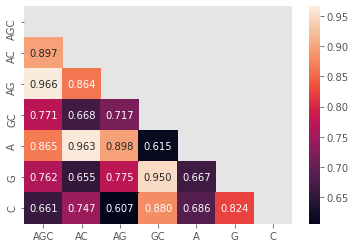

In [330]:
sns.heatmap(corr, mask=mask, annot=True, fmt='.3f', 
            xticklabels=['AGC', 'AC', 'AG', 'GC', 'A', 'G', 'C'],
            yticklabels=['AGC', 'AC', 'AG', 'GC', 'A', 'G', 'C']);

**Feature Engineering Ideas**
* `what is the most purchased product across customer age and city.`
* `what is the most purchased product across customer age and gender.`
* `what is the number of unique products purchased by a customer, by customers across age, gender, residency, occupation, city (we could aggregate them).`
* `What is number of purchases done by the customer`
* `What is the number of times a product has been bought by customers across age, gender and location or age and gender, gender and location, age and location`

### Summary Statistics

In [41]:
print('The Purchase amount of products from ABC Private Limited by customers is {:,.0f} on average.'.format(
    train.Purchase.mean()))

The Purchase amount of products from ABC Private Limited by customers is 9,264 on average.


In [51]:
train.Purchase.apply(['min','mean', 'median', 'max', 'skew', 'kurtosis'])

min            12.000000
mean         9263.968713
median       8047.000000
max         23961.000000
skew            0.600140
kurtosis       -0.338378
Name: Purchase, dtype: float64

**`From the Summary statistics of the Purchase amount, we see that the minimum purchase amount is `12`, the mean purchase amount is `9264`, median is `8047`, and the maximum amount purchased is `~24000` products.`**

**`Looking at the distribution summaries- skewness and the kurtosis- we see that the purchase amount is lightly right tailed (as indicated by the lower positive skewness value and the negative value of the kurtosis).`**

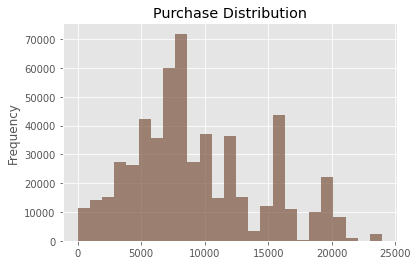

In [202]:
train.Purchase.plot.hist(title='Purchase Distribution', color=randomColors(), alpha=.7, bins=25);

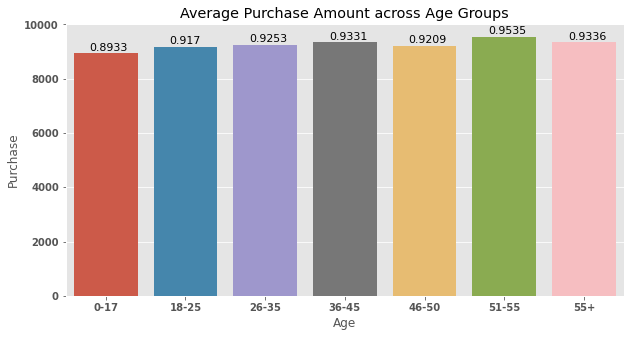

In [423]:
plt.figure(figsize=(10,5))
ax= sns.barplot('Age', 'Purchase', data=train, ci=None,
                order=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
ax.set(title='Average Purchase Amount across Age Groups')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

for i in ax.patches:
    plt.text(i.get_x()+0.2, i.get_height()+100, str(round(i.get_height()/1e4,4)), fontsize=11, fontweight=20.5);

In [34]:
train.groupby('Age').Purchase.mean()

Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64

**`Customers between the Ages of 51 and 55 (inclusive), purchase higher than other Age groups, by average. This is followed by customers above 55 and then customers from 36-45.`**

<br>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Hypothesis Testing**

                    H0: There is Independence or there is no relationship
                    HA: There's no Independence or there's a relationship

* `Is there a relationship between the location of a customer and the purchase amount?`
* `Is there a relationship between the Age group and the amount of product purchased?`
* `Does Gender, marital status of a customer affect the purchase amount?`
* `Does the number of years a customer has stayed in a city affect the amount of product purchased?`
* `Is there a relationship between the purchase amount and the customer location and age?`
* `Is there a relationship between the purchase amount and the customer sex and age?`

**`In order to answer this question I'll bin the purchase amount into five(5): purchases less than 5000, btw 5000 and 15000 and those above 15000`**

In [134]:
binned_purchase_amount = pd.cut(train.Purchase, [0, 5000, 10000, 15000, 20000, 25000], 
                                labels=['<5K', '5K-10K', '10K-15K', '15K-20K', '>=20'])

In [135]:
city_purchase = pd.crosstab(train.City_Category, binned_purchase_amount)

In [136]:
print('p-value for test for independence between customer location and purchase amount is {}'.format(
    stats.chi2_contingency(city_purchase)[1]))

p-value for test for independence between customer location and purchase amount is 0.0


In [137]:
age_purchase = pd.crosstab(train.Age,binned_purchase_amount)

In [138]:
print('p-value for test for independence between customer Age and purchase amount is {:.5f}'.format(
    stats.chi2_contingency(age_purchase)[1]))

p-value for test for independence between customer Age and purchase amount is 0.00000


In [139]:
sex_purchase = pd.crosstab(train.Gender, binned_purchase_amount)

In [140]:
print('p-value for test for independence between customer Sex and purchase amount is {:.7f}'.format(
    stats.chi2_contingency(sex_purchase)[1]))

p-value for test for independence between customer Sex and purchase amount is 0.0000000


In [141]:
marital_purchase= pd.crosstab(train.Marital_Status, binned_purchase_amount)

In [142]:
print('p-value for test for independence between customer\'s marital status and purchase amount is {:.7f}'.format(
    stats.chi2_contingency(marital_purchase)[1]))

p-value for test for independence between customer's marital status and purchase amount is 0.0000117


In [143]:
residency_purchase= pd.crosstab(train.Stay_In_Current_City_Years, binned_purchase_amount)

In [144]:
print('p-value for test for independence between customer\'s stay in the city and purchase amount is {:.7f}'.format(
    stats.chi2_contingency(residency_purchase)[1]))

p-value for test for independence between customer's stay in the city and purchase amount is 0.0000000


In [145]:
city_age_purchase = pd.crosstab(binned_purchase_amount, [train.Age, train.City_Category])

In [149]:
print('p-value for test for independence between purchase amount and customer\'s location and age is {:.7f}'.format(
    stats.chi2_contingency(city_age_purchase)[1]))

p-value for test for independence between purchase amount and customer's location and age is 0.0000000


In [147]:
sex_age_purchase = pd.crosstab(binned_purchase_amount, [train.Gender, train.Age])

In [150]:
print('p-value for test for independence between purchase amount and customer\'s sex and age is {:.7f}'.format(
    stats.chi2_contingency(sex_age_purchase)[1]))

p-value for test for independence between purchase amount and customer's sex and age is 0.0000000


`For all the test for independence, we see that there's actually a relationship between those criteria and the purchase amount, from the p-values recorded from all. Hence, we reject the null hypothesis and accept the alternative, and finally conclude that we have strong evidence that the purchase amount of customers is dependent on other factors.`

**`Missing Values`**

**`Some Products may have a sub category1 sub category2. For products which do not have a subcategory, it is reasonable to replace them with 'None' or we may prefer not to fill them since some models can handle them missing values`**

In [429]:
train.Product_Category_1.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [427]:
train.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [428]:
train.Product_Category_3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])